## **Libraries Used**

In [108]:
# to install these packages if they aren't there already, use below install commands:
# !pip install pandas
# !pip install numpy
# !pip install sklearn
# !pip install scipy
# !pip install imblearn
import pandas as pd
import numpy as np
import random
import sklearn


In [109]:
sklearn.__version__

'0.23.1'

In [110]:
%%time 
# this is a command to know the time taken for loading data
import os
os.chdir(r'C:\Users\BharatRamAmmu\OneDrive - mc2bis\Mc2bis\VS - OPT data\Kaggle Fraud\ieee fraud customer transactions')
# loading identity variables  and transaction variables in train data
train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')

Wall time: 16.2 s


## let's combine the transaction data and identity data and work with the whole dataset

In [111]:
# let's combine the data and work with the whole dataset
df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
df= df.sample(frac= 0.1,random_state=0)


In [112]:
df.isFraud.value_counts()

0    57049
1     2005
Name: isFraud, dtype: int64

In [113]:
del train_identity,train_transaction

In [114]:
df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
7681,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
570242,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340470,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131781,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
472772,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562150,3549150,0,14898396,335.000,W,2616,327.0,150.0,discover,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510600,3497600,0,13371647,20.950,W,3277,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588755,3575755,0,15775109,59.000,W,9486,127.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534246,3521246,0,14071016,25.950,W,2392,360.0,150.0,mastercard,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pre-Processing and Data Wrangling:

## Train Test Data Split - to evaluate performance in an unbiased manner

In [115]:
# set x and y variables
y = df['isFraud']
x= df.loc[:, df.columns != 'isFraud']


from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 123)


In [116]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41337 entries, 71646 to 281764
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(3), object(31)
memory usage: 136.9+ MB


## Step 1. Check for missingness in variables 

In [117]:
xTrain.isnull().sum()

TransactionID         0
TransactionDT         0
TransactionAmt        0
ProductCD             0
card1                 0
                  ...  
id_36             31403
id_37             31403
id_38             31403
DeviceType        31419
DeviceInfo        33011
Length: 433, dtype: int64

## Eliminate automatically variables with more than 20% of missingness

In [118]:
# Eliminate automatically variables with more than 20% of missingness

xTrain = xTrain[xTrain.columns[xTrain.isnull().mean() < 0.2]]

In [119]:
missing_cols=xTrain.columns[xTrain.isnull().mean() > 0]
print(missing_cols)

Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
       'P_emaildomain', 'D1', 'D10',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=162)


In [120]:
xTrain['card5'].isnull().mean()

0.007499334736434671

## Imputation : Filling missing values in a variable by reasonable approximations like mean of the variable to allow machine learning models to work

## Step 1a. Single Imputation Technique

## Impute Numeric Variables with mean of the variable

In [121]:
xTrain_single= xTrain
cols= xTrain_single.columns
num_cols = xTrain_single.select_dtypes(include=np.number).columns
xTrain_single[num_cols] = xTrain_single[num_cols].fillna(xTrain[num_cols].mean())
print(num_cols)
print(xTrain_single[num_cols].mean())

Index(['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2',
       'card3', 'card5', 'addr1', 'addr2', 'C1',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=177)
TransactionID     3.281805e+06
TransactionDT     7.357705e+06
TransactionAmt    1.347207e+02
card1             9.912457e+03
card2             3.626188e+02
                      ...     
V317              2.722976e+02
V318              1.823263e+02
V319              1.665254e+01
V320              4.211091e+01
V321              2.752951e+01
Length: 177, dtype: float64


## Impute Categorical Variables with mode of the variable

In [122]:
cat_cols= list(set(cols) - set(num_cols))
xTrain_single[cat_cols] = xTrain_single[cat_cols].fillna(xTrain[cat_cols].mode().iloc[0])
train_cols = xTrain_single.columns
print(cat_cols)
print(xTrain_single[cat_cols].mode().iloc[0])

['P_emaildomain', 'card6', 'ProductCD', 'card4']
P_emaildomain    gmail.com
card6                debit
ProductCD                W
card4                 visa
Name: 0, dtype: object


## Step 1b Multivariate Imputation Example

### Multivariate Imputation : Imputation using values of other variables to predict the value of missing variable

In [123]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [124]:
xTrain_multiple= xTrain
imp = IterativeImputer(max_iter=100, random_state=0)
numeric_missing_cols= xTrain_multiple[missing_cols].select_dtypes(include=np.number).columns
xTrain_multiple[numeric_missing_cols]= imp.fit_transform(xTrain_multiple[numeric_missing_cols].values)
print(numeric_missing_cols)
# the model learns that the second feature is double the first
#print(np.round(imp.transform(X_test)))

Index(['card2', 'card3', 'card5', 'addr1', 'addr2', 'D1', 'D10', 'D15', 'V12',
       'V13',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=159)


## Let us now look at difference in the variable the imputation technique caused - let's take variable 'card5'

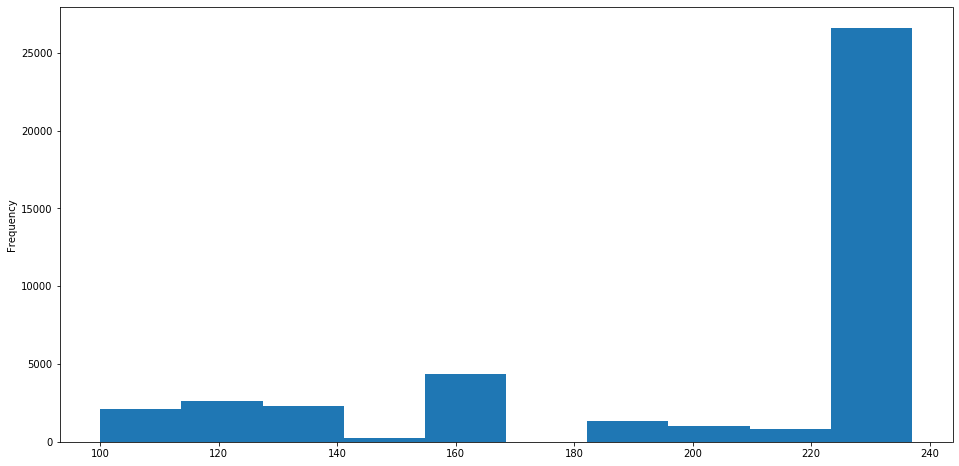

In [125]:
xTrain_single['card5'].plot.hist(figsize=(16,8));

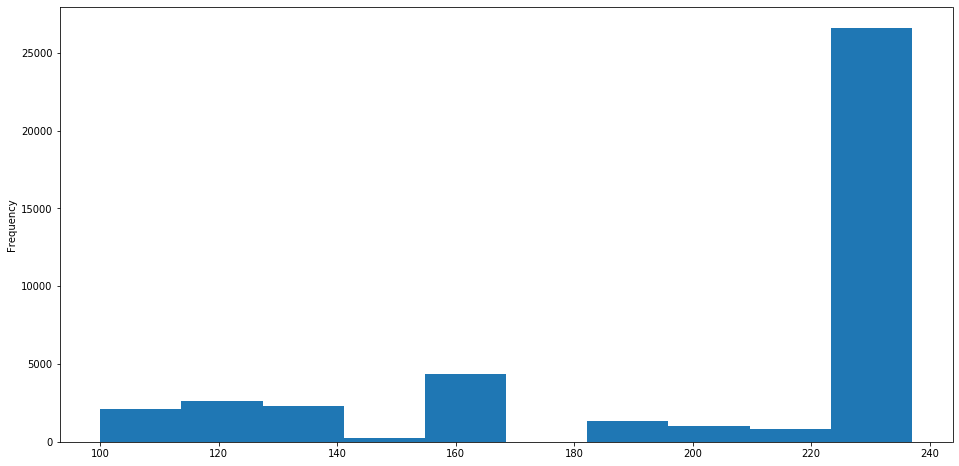

In [126]:
xTrain_multiple['card5'].plot.hist(figsize=(16,8));

## They look almost same, but distribution of these variables (mean, standard deviation etc) also didn't change which way we imputed missing values, as you can see below 

In [127]:
xTrain_single['card5'].describe()

count    41337.000000
mean       199.235991
std         41.036349
min        100.000000
25%        166.000000
50%        226.000000
75%        226.000000
max        237.000000
Name: card5, dtype: float64

In [128]:
xTrain_multiple['card5'].describe()

count    41337.000000
mean       199.235991
std         41.036349
min        100.000000
25%        166.000000
50%        226.000000
75%        226.000000
max        237.000000
Name: card5, dtype: float64

The mean, std etc remain the same for the variable whether we imputed by single imputation technique or multiple imputation technique.

### Hence giving an insight that in the bigger picture, it is okay to impute with single imputation technqiue, keeping it simple.. 

In [129]:
xTrain= xTrain_single

## Step 2. One hot encoding : To make all variables numeric to feed to machine learning process further

In [130]:
xTrain.info()
xTrain_dummy = pd.get_dummies(xTrain, prefix_sep='_', drop_first=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41337 entries, 71646 to 281764
Columns: 181 entries, TransactionID to V321
dtypes: float64(174), int64(3), object(4)
memory usage: 57.4+ MB


In [131]:
xTrain_dummy

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
71646,3058646,1612658,46.500,7861,494.0,150.0,226.0,299.000000,87.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
482434,3469434,12533197,20.950,10748,455.0,150.0,195.0,337.000000,87.000000,9.0,...,0,0,0,0,0,0,0,0,0,0
315515,3302515,7855766,139.117,4606,141.0,185.0,137.0,290.763705,86.802851,1.0,...,0,0,0,0,0,0,0,0,0,0
23196,3010196,595984,280.330,4141,404.0,150.0,102.0,327.000000,87.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
301879,3288879,7447462,186.610,13266,321.0,150.0,226.0,158.000000,87.000000,13.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513688,3500688,13452492,311.950,10057,225.0,150.0,224.0,123.000000,87.000000,3.0,...,0,0,0,0,0,0,0,0,0,0
51837,3038837,1212291,114.950,2492,543.0,150.0,224.0,299.000000,87.000000,3.0,...,0,0,0,0,0,0,0,0,0,0
68357,3055357,1544901,75.000,1690,516.0,150.0,224.0,110.000000,87.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
157269,3144269,3273875,206.000,17188,321.0,150.0,226.0,310.000000,87.000000,6.0,...,0,0,0,0,0,0,0,0,0,0


## Step 3. Scaling/Normalizing Data

The preprocessing module further provides a utility class StandardScaler that implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set.

In [219]:
from sklearn import preprocessing
scaled_tr = preprocessing.StandardScaler().fit_transform(xTrain_dummy)
final_tr = pd.DataFrame(data=scaled_tr)
final_tr.columns= xTrain_dummy.columns
final_tr
print(final_tr.head())
print(final_tr.shape)

   TransactionID  TransactionDT  TransactionAmt     card1     card2     card3  \
0      -1.312209      -1.247296       -0.374456 -0.418551  0.842286 -0.284774   
1       1.103287       1.123641       -0.482904  0.170473  0.592257 -0.284774   
2       0.121778       0.108133        0.018660 -1.082656 -1.420799  2.807597   
3      -1.597102      -1.468024        0.618044 -1.177529  0.265295 -0.284774   
4       0.041596       0.019487        0.220246  0.684211 -0.266818 -0.284774   

      card5     addr1         addr2        C1  ...  P_emaildomain_web.de  \
0  0.652210  0.085823  7.759246e-02 -0.099786  ...             -0.020872   
1 -0.103227  0.481788  7.759246e-02 -0.033725  ...             -0.020872   
2 -1.516625  0.000000 -5.593017e-15 -0.099786  ...             -0.020872   
3 -2.369537  0.377587  7.759246e-02 -0.099786  ...             -0.020872   
4  0.652210 -1.383415  7.759246e-02 -0.000694  ...             -0.020872   

   P_emaildomain_windstream.net  P_emaildomain_yahoo.co.

In [221]:
from sklearn import preprocessing
#scaled_tr = preprocessing.StandardScaler().fit_transform(xTrain_dummy)
final_tr = pd.DataFrame(data=xTrain_dummy)
final_tr.columns= xTrain_dummy.columns
final_tr
print(final_tr.head())
print(final_tr.shape)

        TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  \
71646         3058646        1612658          46.500   7861  494.0  150.0   
482434        3469434       12533197          20.950  10748  455.0  150.0   
315515        3302515        7855766         139.117   4606  141.0  185.0   
23196         3010196         595984         280.330   4141  404.0  150.0   
301879        3288879        7447462         186.610  13266  321.0  150.0   

        card5       addr1      addr2    C1  ...  P_emaildomain_web.de  \
71646   226.0  299.000000  87.000000   1.0  ...                     0   
482434  195.0  337.000000  87.000000   9.0  ...                     0   
315515  137.0  290.763705  86.802851   1.0  ...                     0   
23196   102.0  327.000000  87.000000   1.0  ...                     0   
301879  226.0  158.000000  87.000000  13.0  ...                     0   

        P_emaildomain_windstream.net  P_emaildomain_yahoo.co.jp  \
71646                          

In [222]:
## Decision Tree using grid search CV
from sklearn import tree
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4,cv=5,scoring = 'roc_auc')
clf.fit(X=final_tr, y=yTrain)
dt = clf.best_estimator_  #final decision tree!
print (clf.best_score_, clf.best_params_) 

0.7653087721493967 {'max_depth': 8}


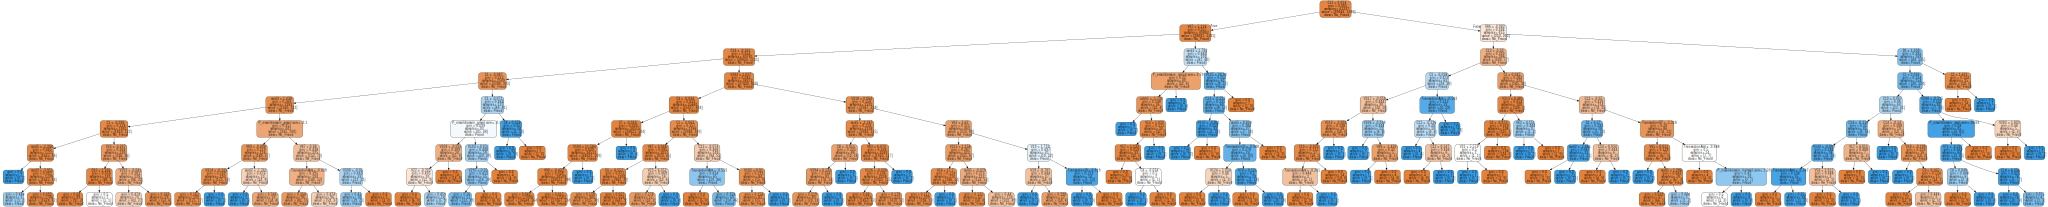

In [205]:
## Visualizing the decision tree- load visualization libraries
from sklearn.tree import export_graphviz
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None, 
                    feature_names=final_tr.columns,  
                      class_names=['No_Fraud','Fraud'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


## Part 2: Handling Class Imbalance
###  Repeat the above with handled Class Imbalance
### *** Let us use data from step 2 (one hot encoded), use SMOTE and resample data and scale data (step 3)) ***

We can update the example to first oversample the minority class to have 20 percent the number of examples of the majority class (here about 8k), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 15k).

In [290]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.2)
#under = RandomUnderSampler(sampling_strategy=0.2)
#,('u', under)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
X_res, y_res = pipeline.fit_resample(xTrain_dummy, yTrain)


print('Original dataset shape %s' % Counter(yTrain))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 39944, 1: 1393})
Resampled dataset shape Counter({0: 39944, 1: 7988})


### As you see in the above output, the dataset originally had just 1393 fraud cases and arodun 40k non fraud transactions.
### Now thanks to oversampling via SMOTE and undersampling, we have  number of fraud and non-fraud cases in the ratio 2:1 and are relatively balanced information for model to learn

##  Step 3  Scaling Data for SMOTE'd (Resampled) Data

The preprocessing module further provides a utility class StandardScaler that implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set.

In [291]:
from sklearn import preprocessing
scaled_tr_res = preprocessing.StandardScaler().fit_transform(X_res)
final_tr_res = pd.DataFrame(data=scaled_tr_res)
final_tr_res.columns= xTrain_dummy.columns
final_tr_res
print(final_tr_res.head())

   TransactionID  TransactionDT  TransactionAmt     card1     card2     card3  \
0      -1.328236      -1.260996       -0.390129 -0.419173  0.867214 -0.369979   
1       1.106584       1.127373       -0.501680  0.185992  0.611954 -0.369979   
2       0.117223       0.104399        0.014234 -1.101477 -1.443220  2.491146   
3      -1.615408      -1.483347        0.630766 -1.198949  0.278152 -0.369979   
4       0.036400       0.015101        0.221587  0.713809 -0.265095 -0.369979   

      card5     addr1     addr2        C1  ...  P_emaildomain_web.de  \
0  0.680276  0.084917  0.085015 -0.107921  ...             -0.019382   
1 -0.084053  0.496728  0.085015 -0.052322  ...             -0.019382   
2 -1.514088 -0.004340  0.007528 -0.107921  ...             -0.019382   
3 -2.377040  0.388357  0.085015 -0.107921  ...             -0.019382   
4  0.680276 -1.443116  0.085015 -0.024523  ...             -0.019382   

   P_emaildomain_windstream.net  P_emaildomain_yahoo.co.jp  \
0                 

In [292]:
from sklearn import preprocessing
#scaled_tr_res = preprocessing.StandardScaler().fit_transform(X_res)
final_tr_res = pd.DataFrame(data=X_res)
final_tr_res.columns= xTrain_dummy.columns
final_tr_res
print(final_tr_res.head())

   TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  card5  \
0        3058646        1612658          46.500   7861  494.0  150.0  226.0   
1        3469434       12533197          20.950  10748  455.0  150.0  195.0   
2        3302515        7855766         139.117   4606  141.0  185.0  137.0   
3        3010196         595984         280.330   4141  404.0  150.0  102.0   
4        3288879        7447462         186.610  13266  321.0  150.0  226.0   

        addr1      addr2    C1  ...  P_emaildomain_web.de  \
0  299.000000  87.000000   1.0  ...                     0   
1  337.000000  87.000000   9.0  ...                     0   
2  290.763705  86.802851   1.0  ...                     0   
3  327.000000  87.000000   1.0  ...                     0   
4  158.000000  87.000000  13.0  ...                     0   

   P_emaildomain_windstream.net  P_emaildomain_yahoo.co.jp  \
0                             0                          0   
1                             0   

In [293]:
## Decision Tree using grid search CV
from sklearn import tree
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4,cv=5,scoring = 'roc_auc')
clf.fit(X=final_tr_res, y=y_res)
dt_smote = clf.best_estimator_  #final decision tree!
print (clf.best_score_, clf.best_params_) 

0.9337759506373929 {'max_depth': 6}


## As you see, there is an increased performance on resampled data after handling class imbalance. But let us now judge early! Let us judge by the performance on the unseen test data which we separated earlier

## Apply on Test Data : apply steps 1-3 namely 
1. Apply single imputation, 
2. One Hot encode variables
3. Scale Data

### Step 1: Account for missing values with single imputation like we did earlier

In [294]:

cols= xTest.columns
num_cols = xTest.select_dtypes(include=np.number).columns
xTest[num_cols] = xTest[num_cols].fillna(xTest[num_cols].mean())

cat_cols= list(set(cols) - set(num_cols))
xTest[cat_cols] = xTest[cat_cols].fillna(xTest[cat_cols].mode().iloc[0])
test_cols = xTest.columns


### Step extra:  Select only those features which are there in training #

In [295]:

#train_cols = xTrain.columns
xTest = xTest[train_cols] 

### Step 2. One Hot encode variables

In [296]:
xTest.info()
xTest_dummy = pd.get_dummies(xTest, prefix_sep='_', drop_first=True)
# Dummify categorical vars
xTest_dummy = pd.get_dummies(xTest, prefix_sep='__', drop_first=True)

##missing columns levels train and test
missing_levels_cols= list(set(xTrain_dummy.columns) - set(xTest_dummy.columns))


for c in missing_levels_cols:
    xTest_dummy[c]=0

# Select only those columns which are there in training data
xTest_dummy=xTest_dummy[xTrain_dummy.columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17717 entries, 208138 to 520297
Columns: 181 entries, TransactionID to V321
dtypes: float64(174), int64(3), object(4)
memory usage: 24.6+ MB


## 3. Scale test Data just like the Training Data

In [297]:
from sklearn import preprocessing
scaled_ts=preprocessing.StandardScaler().fit_transform(xTest_dummy)
final_ts = pd.DataFrame(data=scaled_ts)
final_ts.columns= xTest_dummy.columns
final_ts
print(final_ts.head())
print(final_ts.shape)

   TransactionID  TransactionDT  TransactionAmt     card1         card2  \
0      -0.514765      -0.558422       -0.421857  1.493627 -2.620968e-01   
1      -0.593868      -0.650040        2.113386 -1.495058 -3.632337e-16   
2      -0.214865      -0.254426       -0.368819  0.548741  5.813931e-01   
3      -1.567012      -1.443216        0.075728  1.385130 -1.226998e+00   
4       0.412205       0.367916        0.034610 -1.568893  1.169280e+00   

      card3     card5         addr1         addr2        C1  ...  \
0 -0.291691  0.657365  2.053189e-01  7.859043e-02 -0.090129  ...   
1 -0.291691 -2.339094 -9.048831e-01  7.859043e-02 -0.097956  ...   
2 -0.291691  0.657365  9.010928e-02  7.859043e-02 -0.097956  ...   
3 -0.291691  0.657365  9.010928e-02  7.859043e-02  0.027283  ...   
4  2.745653  0.657365  5.953554e-16  6.051502e-15 -0.090129  ...   

   P_emaildomain_web.de  P_emaildomain_windstream.net  \
0                   0.0                           0.0   
1                   0.0   

In [298]:
from sklearn import preprocessing
#scaled_ts=preprocessing.StandardScaler().fit_transform(xTest_dummy)
final_ts = pd.DataFrame(data=xTest_dummy)
final_ts.columns= xTest_dummy.columns
final_ts
print(final_ts.head())
print(final_ts.shape)

        TransactionID  TransactionDT  TransactionAmt  card1      card2  card3  \
208138        3195138        4809520          36.950  17188  321.00000  150.0   
194635        3181635        4385698         612.950   2616  362.01623  150.0   
259331        3246331        6215794          49.000  12581  453.00000  150.0   
28519         3015519         716506         150.000  16659  170.00000  150.0   
366372        3353372        9094718         140.658   2256  545.00000  185.0   

        card5       addr1      addr2    C1  ...  P_emaildomain_web.de  \
208138  226.0  310.000000  87.000000   2.0  ...                     0   
194635  102.0  204.000000  87.000000   1.0  ...                     0   
259331  226.0  299.000000  87.000000   1.0  ...                     0   
28519   226.0  299.000000  87.000000  17.0  ...                     0   
366372  226.0  290.396535  86.815445   2.0  ...                     0   

        P_emaildomain_windstream.net  P_emaildomain_yahoo.co.jp  \
208138 

In [299]:
ytest_dt = dt.predict_proba(final_ts)



In [300]:
from sklearn.metrics import roc_curve,roc_auc_score
roc_auc_score(yTest,ytest_dt[:,1])
#roc_curve(yTest,ytest_dt[:,1])

0.7762309591087726

In [301]:
ytest_dt_smote = dt_smote.predict_proba(final_ts)
roc_auc_score(yTest,ytest_dt_smote[:,1])

0.7851051177559596

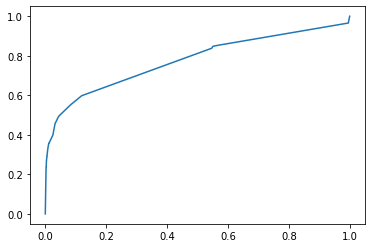

In [289]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(yTest,ytest_dt[:,1], pos_label=1)
plt.plot(fpr, tpr)